Epoch 1/100
11/11 [==============================] - 4s 71ms/step - loss: 617.6520 - val_loss: 539.9249
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 584.5605 - val_loss: 511.2564
Epoch 3/100
11/11 [==============================] - 0s 23ms/step - loss: 553.2787 - val_loss: 479.2999
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 516.1128 - val_loss: 441.0934
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 470.1464 - val_loss: 395.3087
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 415.5818 - val_loss: 341.6141
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 351.8565 - val_loss: 281.9036
Epoch 8/100
11/11 [==============================] - 0s 16ms/step - loss: 284.7925 - val_loss: 217.7852
Epoch 9/100
11/11 [==============================] - 0s 28ms/step - loss: 214.1164 - val_loss: 156.5212
Epoch 10/100
11/11 [==============================] - 0s 30ms/st

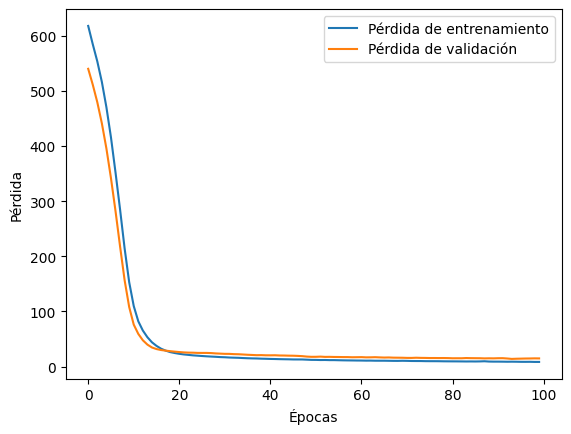

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Descargar el dataset desde una URL
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
data = pd.read_csv(url)

# Separar características y etiquetas
X = data.drop('medv', axis=1)
y = data['medv']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo
mse = model.evaluate(X_test_scaled, y_test)
print(f'Error cuadrático medio en el conjunto de prueba: {mse:.4f}')

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()